In [42]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (12, 8)

In [43]:
import lightgbm as lgb
import pandas as pd
from sklearn.metrics import mean_squared_error

In [44]:
df_train = pd.read_csv('../../LightGBM/examples/regression/regression.train', header=None, sep='\t')
df_test = pd.read_csv('../../LightGBM/examples/regression/regression.test', header=None, sep='\t')

In [45]:
y_train = df_train[0].values
y_test = df_test[0].values
X_train = df_train.drop(0, axis=1).values
X_test = df_test.drop(0, axis=1).values

# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [46]:
# specify your configurations as a dict
params = {
    'num_leaves': 5,
    'metric': ('l1', 'l2'),
    'verbose': 0
}

evals_result = {}  # to record eval results for plotting

In [47]:
print('Start training...')
# train
gbm = lgb.train(
    params,
    lgb_train,
    num_boost_round=100,
    valid_sets=[lgb_train, lgb_test],
    feature_name=['f' + str(i + 1) for i in range(28)],
    categorical_feature=[21],
    evals_result=evals_result,
    verbose_eval=10
)

Start training...
[10]	training's l2: 0.217995	training's l1: 0.457448	valid_1's l2: 0.21641	valid_1's l1: 0.456464
[20]	training's l2: 0.205099	training's l1: 0.436869	valid_1's l2: 0.201616	valid_1's l1: 0.434057
[30]	training's l2: 0.197421	training's l1: 0.421302	valid_1's l2: 0.192514	valid_1's l1: 0.417019
[40]	training's l2: 0.192856	training's l1: 0.411107	valid_1's l2: 0.187258	valid_1's l1: 0.406303
[50]	training's l2: 0.189593	training's l1: 0.403695	valid_1's l2: 0.183688	valid_1's l1: 0.398997
[60]	training's l2: 0.187043	training's l1: 0.398704	valid_1's l2: 0.181009	valid_1's l1: 0.393977
[70]	training's l2: 0.184982	training's l1: 0.394876	valid_1's l2: 0.178803	valid_1's l1: 0.389805
[80]	training's l2: 0.1828	training's l1: 0.391147	valid_1's l2: 0.176799	valid_1's l1: 0.386476
[90]	training's l2: 0.180817	training's l1: 0.388101	valid_1's l2: 0.175775	valid_1's l1: 0.384404
[100]	training's l2: 0.179171	training's l1: 0.385174	valid_1's l2: 0.175321	valid_1's l1: 0.3

Plot metrics recorded during training...


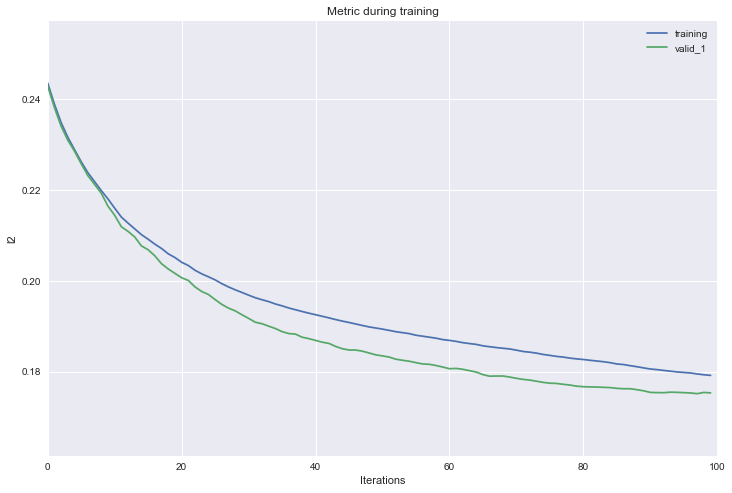

In [48]:
print('Plot metrics recorded during training...')
ax = lgb.plot_metric(evals_result, metric='l2')
plt.show()

Plot feature importances...


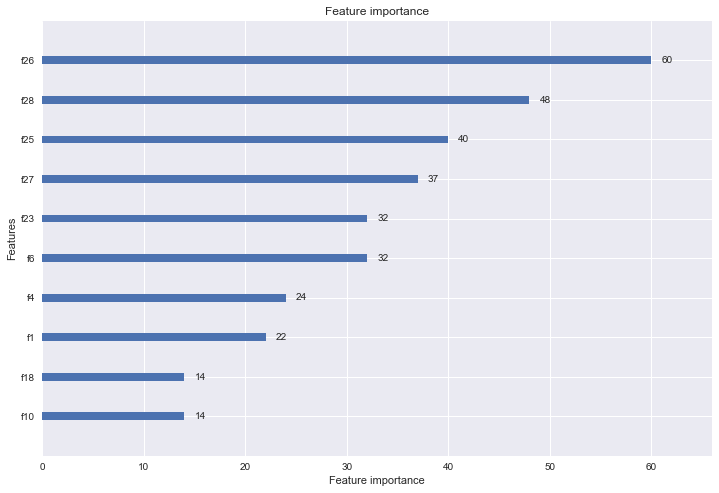

In [49]:
print('Plot feature importances...')
ax = lgb.plot_importance(gbm, max_num_features=10)
plt.show()

Plot 84th tree with graphviz...


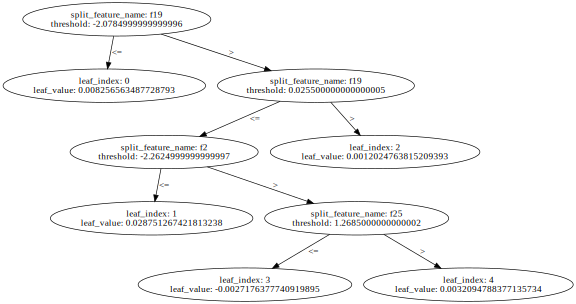

In [52]:
print('Plot 84th tree with graphviz...')
graph = lgb.create_tree_digraph(gbm, tree_index=83, name='Tree84', format='png')
graph.attr(size='8,5')
graph

## Scikit-Learn style API

In [53]:
gbm = lgb.LGBMRegressor(objective='regression',
                        num_leaves=31,
                        learning_rate=0.05,
                        n_estimators=20)
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='l1',
        early_stopping_rounds=5)


[1]	valid_0's l1: 0.491735	valid_0's l2: 0.242763
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.486563	valid_0's l2: 0.237895
[3]	valid_0's l1: 0.481489	valid_0's l2: 0.233277
[4]	valid_0's l1: 0.476848	valid_0's l2: 0.22925
[5]	valid_0's l1: 0.47305	valid_0's l2: 0.226155
[6]	valid_0's l1: 0.469049	valid_0's l2: 0.222963
[7]	valid_0's l1: 0.465556	valid_0's l2: 0.220364
[8]	valid_0's l1: 0.462208	valid_0's l2: 0.217872
[9]	valid_0's l1: 0.458676	valid_0's l2: 0.215328
[10]	valid_0's l1: 0.454998	valid_0's l2: 0.212743
[11]	valid_0's l1: 0.452047	valid_0's l2: 0.210805
[12]	valid_0's l1: 0.449158	valid_0's l2: 0.208945
[13]	valid_0's l1: 0.44608	valid_0's l2: 0.206986
[14]	valid_0's l1: 0.443554	valid_0's l2: 0.205513
[15]	valid_0's l1: 0.440643	valid_0's l2: 0.203728
[16]	valid_0's l1: 0.437687	valid_0's l2: 0.201865
[17]	valid_0's l1: 0.435454	valid_0's l2: 0.200639
[18]	valid_0's l1: 0.433288	valid_0's l2: 0.199522
[19]	valid_0's l1: 0.431297	valid

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.05, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=20, n_jobs=-1, num_leaves=31, objective='regression',
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [54]:
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)

In [55]:
print('Feature importances:', list(gbm.feature_importances_))

Feature importances: [23, 7, 0, 33, 5, 56, 9, 1, 1, 21, 2, 5, 1, 19, 9, 6, 1, 10, 4, 10, 0, 31, 61, 4, 48, 102, 52, 79]


## Advanced Example

In [56]:
import json
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

try:
    import cPickle as pickle
except BaseException:
    import pickle

# load or create your dataset
print('Load data...')
df_train = pd.read_csv('../../LightGBM/examples/binary_classification/binary.train', header=None, sep='\t')
df_test = pd.read_csv('../../LightGBM/examples/binary_classification/binary.test', header=None, sep='\t')
W_train = pd.read_csv('../../LightGBM/examples/binary_classification/binary.train.weight', header=None)[0]
W_test = pd.read_csv('../../LightGBM/examples/binary_classification/binary.test.weight', header=None)[0]

y_train = df_train[0].values
y_test = df_test[0].values
X_train = df_train.drop(0, axis=1).values
X_test = df_test.drop(0, axis=1).values

num_train, num_feature = X_train.shape

# create dataset for lightgbm
# if you want to re-use data, remember to set free_raw_data=False
lgb_train = lgb.Dataset(X_train, y_train,
                        weight=W_train, free_raw_data=False)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train,
                       weight=W_test, free_raw_data=False)

# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# generate a feature name
feature_name = ['feature_' + str(col) for col in range(num_feature)]

print('Start training...')
# feature_name and categorical_feature
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=10,
                valid_sets=lgb_train,  # eval training data
                feature_name=feature_name,
                categorical_feature=[21])

# check feature name
print('Finish first 10 rounds...')
print('7th feature name is:', repr(lgb_train.feature_name[6]))

# save model to file
gbm.save_model('model.txt')

# dump model to JSON (and save to file)
print('Dump model to JSON...')
model_json = gbm.dump_model()

with open('model.json', 'w+') as f:
    json.dump(model_json, f, indent=4)

# feature names
print('Feature names:', gbm.feature_name())

# feature importances
print('Feature importances:', list(gbm.feature_importance()))

# load model to predict
print('Load model to predict')
bst = lgb.Booster(model_file='model.txt')
# can only predict with the best iteration (or the saving iteration)
y_pred = bst.predict(X_test)
# eval with loaded model
print('The rmse of loaded model\'s prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)

# dump model with pickle
with open('model.pkl', 'wb') as fout:
    pickle.dump(gbm, fout)
# load model with pickle to predict
with open('model.pkl', 'rb') as fin:
    pkl_bst = pickle.load(fin)
# can predict with any iteration when loaded in pickle way
y_pred = pkl_bst.predict(X_test, num_iteration=7)
# eval with loaded model
print('The rmse of pickled model\'s prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)

# continue training
# init_model accepts:
# 1. model file name
# 2. Booster()
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=10,
                init_model='model.txt',
                valid_sets=lgb_eval)

print('Finish 10 - 20 rounds with model file...')

# decay learning rates
# learning_rates accepts:
# 1. list/tuple with length = num_boost_round
# 2. function(curr_iter)
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=10,
                init_model=gbm,
                learning_rates=lambda iter: 0.05 * (0.99 ** iter),
                valid_sets=lgb_eval)

print('Finish 20 - 30 rounds with decay learning rates...')

# change other parameters during training
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=10,
                init_model=gbm,
                valid_sets=lgb_eval,
                callbacks=[lgb.reset_parameter(bagging_fraction=[0.7] * 5 + [0.6] * 5)])

print('Finish 30 - 40 rounds with changing bagging_fraction...')


# self-defined objective function
# f(preds: array, train_data: Dataset) -> grad: array, hess: array
# log likelihood loss
def loglikelood(preds, train_data):
    labels = train_data.get_label()
    preds = 1. / (1. + np.exp(-preds))
    grad = preds - labels
    hess = preds * (1. - preds)
    return grad, hess


# self-defined eval metric
# f(preds: array, train_data: Dataset) -> name: string, eval_result: float, is_higher_better: bool
# binary error
def binary_error(preds, train_data):
    labels = train_data.get_label()
    return 'error', np.mean(labels != (preds > 0.5)), False


gbm = lgb.train(params,
                lgb_train,
                num_boost_round=10,
                init_model=gbm,
                fobj=loglikelood,
                feval=binary_error,
                valid_sets=lgb_eval)

print('Finish 40 - 50 rounds with self-defined objective function and eval metric...')

print('Start a new training job...')


# callback
def reset_metrics():
    def callback(env):
        lgb_eval_new = lgb.Dataset(X_test, y_test, reference=lgb_train)
        if env.iteration - env.begin_iteration == 5:
            print('Add a new valid dataset at iteration 5...')
            env.model.add_valid(lgb_eval_new, 'new valid')
    callback.before_iteration = True
    callback.order = 0
    return callback


gbm = lgb.train(params,
                lgb_train,
                num_boost_round=10,
                valid_sets=lgb_train,
                callbacks=[reset_metrics()])

print('Finish first 10 rounds with callback function...')


Load data...
Start training...
[1]	training's binary_logloss: 0.680298
[2]	training's binary_logloss: 0.672021
[3]	training's binary_logloss: 0.664444
[4]	training's binary_logloss: 0.655536
[5]	training's binary_logloss: 0.647375
[6]	training's binary_logloss: 0.640788
[7]	training's binary_logloss: 0.635012
[8]	training's binary_logloss: 0.628454
[9]	training's binary_logloss: 0.622423
[10]	training's binary_logloss: 0.616808
Finish first 10 rounds...
7th feature name is: 'feature_6'
Dump model to JSON...
Feature names: ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26', 'feature_27']
Feature importances: [8, 4, 0, 19, 8, 36, 3, 0, 2, 10, 5, 1, 0, 9, 5, 3, 0, 2, 2, 5, 1, 0